# Sparse property of Lasso regression

In [1]:
import pandas as pd
import numpy as np
import sklearn

We will use UCI's Bike Sharing dataset here. The original dataset can be found at: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [2]:
data = pd.read_csv('data/Bike-Sharing-Dataset/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Standardize data

The reason why we have to standardize is because we are now doing regularization. Some features can be on a larger scale, for example if we are comparing temperature with the month number, then obviously the coefficient of temperature is likely to be larger than that of month number and is more likely to be penalized heavier, so this may give us a biased result.

In [3]:
variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
predictors = data[variables]
# the response variable will be the count of bike rentals

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(predictors)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
predictors_scaled = pd.DataFrame(scaler.transform(predictors), columns=variables)
predictors_scaled.head()

# we have 11 features

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-0.826662,-0.679946,1.250171,-0.387892
1,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-0.721095,-0.740652,0.479113,0.749602
2,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.634657,-1.749767,-1.339274,0.746632
3,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829
4,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307


### Fit the lasso model and plot coefficients against varying lambdas

In [6]:
from sklearn import linear_model

lambdas = np.arange(1,1500,1)
num_nonzeroes = []
coefs = []
response = data['cnt']

for l in lambdas:
    clf = linear_model.Lasso(alpha=l)
    clf.fit(predictors_scaled,response)

    num_nonzeroes.append((abs(clf.coef_) > 0.0001).sum())
    coefs.append(scaler.inverse_transform(clf.coef_))

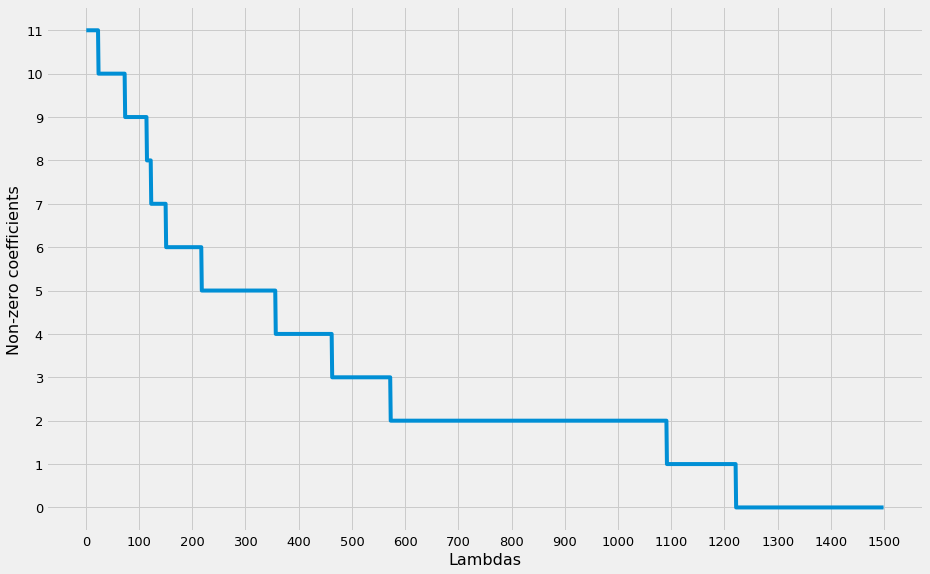

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,9))
plt.style.available
plt.style.use('fivethirtyeight')


plt.figure(figsize=(14,9))
plt.plot(lambdas,num_nonzeroes, linewidth=4)
plt.xlabel('Lambdas', fontsize=16)
plt.ylabel('Non-zero coefficients', fontsize=16)
plt.yticks(np.arange(0, 12, step=1), fontsize=13)
plt.xticks(np.arange(0, 1501, step=100), fontsize=13)
#fig1 = plt.gcf()
#fig1.savefig('bike-sharing-lasso-coef-1.png', dpi=300)

plt.show()

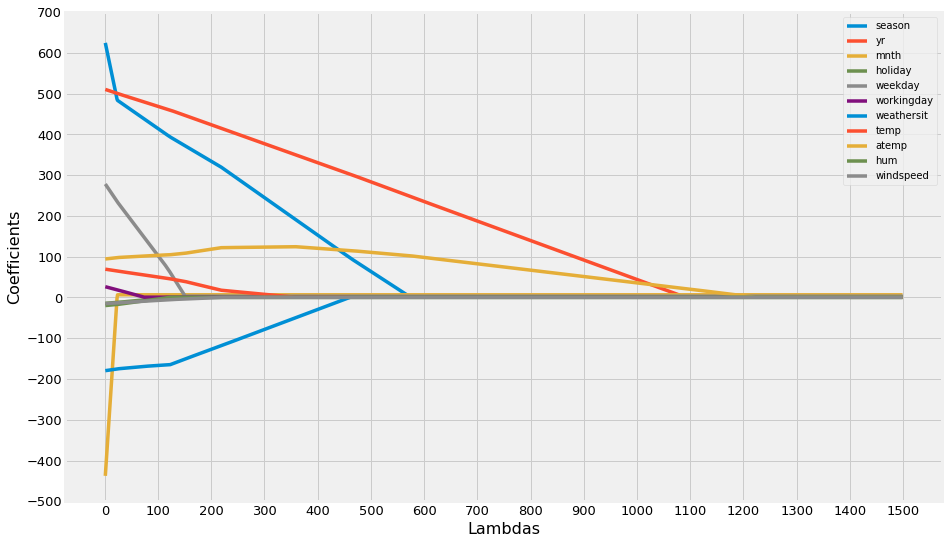

In [8]:
plt.figure(figsize=(14,9))

for i in range(0,11,1):
    plt.plot(lambdas,[x[i] for x in coefs], linewidth=3.5, label=variables[i])

plt.legend(loc='upper right')
plt.xlabel('Lambdas', fontsize=16)
plt.ylabel('Coefficients', fontsize=16)
plt.yticks(np.arange(-500, 701, step=100), fontsize=13)
plt.xticks(np.arange(0, 1501, step=100), fontsize=13)
#fig2 = plt.gcf()
#fig2.savefig('bike-sharing-lasso-coef-2.png', dpi=300)
plt.show()

## Note

Here we see that all of the coefficients are non-zero whem lambda = 0. As lambda increases, we see that about 7 the coefficients of about 7 features go to 0, leaving us with **season**, **weathersit**, **temp**, **atemp** as the 4 non-zero dimensions. These 4 are likely to be the most important features contributing to the number of bike rentals on a given day. We have gone from having to interpret a model with 11 features to 4 or less, which is much comprehensible. **temp** seems to has the highest coefficient, so we expect it to have the most influence on the response variable.